In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt


# seed 값 설정
seed=0
numpy.random.seed(seed)
tf.set_random_seed(seed)

# 데이터 입력
df_pre = pd.read_csv("./dataset/wine.csv", header=None)
df= df_pre.sample(frac=1)
dataset= df.values
X = dataset[:,0:12]
Y = dataset[:, 12]

# 모델 설정
model=Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델 실행
model.fit(X,Y,epochs=200, batch_size=200)

# 결과출력
print('\n Accuracy: %.4f'% (model.evaluate(X,Y)[1]))


Instructions for updating:
non-resource variables are not supported in the long term
Train on 6497 samples
Epoch 1/200
6497/6497 [==============================] - 1s 112us/sample - loss: 0.9305 - acc: 0.4368
Epoch 2/200
6497/6497 [==============================] - 0s 5us/sample - loss: 0.3035 - acc: 0.9052
Epoch 3/200
6497/6497 [==============================] - 0s 5us/sample - loss: 0.2104 - acc: 0.9264
Epoch 4/200
6497/6497 [==============================] - 0s 5us/sample - loss: 0.2002 - acc: 0.9323
Epoch 5/200
6497/6497 [==============================] - 0s 5us/sample - loss: 0.1967 - acc: 0.9338
Epoch 6/200
6497/6497 [==============================] - 0s 5us/sample - loss: 0.1925 - acc: 0.9347
Epoch 7/200
6497/6497 [==============================] - 0s 5us/sample - loss: 0.1899 - acc: 0.9358
Epoch 8/200
6497/6497 [==============================] - 0s 5us/sample - loss: 0.1859 - acc: 0.9354
Epoch 9/200
6497/6497 [==============================] - 0s 5us/sample - loss: 0.1827 - acc

6497/6497 [==============================] - 0s 5us/sample - loss: 0.0528 - acc: 0.9837
Epoch 79/200
6497/6497 [==============================] - 0s 5us/sample - loss: 0.0545 - acc: 0.9837
Epoch 80/200
6497/6497 [==============================] - 0s 5us/sample - loss: 0.0619 - acc: 0.9806
Epoch 81/200
6497/6497 [==============================] - 0s 5us/sample - loss: 0.0537 - acc: 0.9835
Epoch 82/200
6497/6497 [==============================] - 0s 5us/sample - loss: 0.0544 - acc: 0.9841
Epoch 83/200
6497/6497 [==============================] - 0s 4us/sample - loss: 0.0513 - acc: 0.9849
Epoch 84/200
6497/6497 [==============================] - 0s 4us/sample - loss: 0.0537 - acc: 0.9828
Epoch 85/200
6497/6497 [==============================] - 0s 5us/sample - loss: 0.0520 - acc: 0.9848
Epoch 86/200
6497/6497 [==============================] - 0s 5us/sample - loss: 0.0568 - acc: 0.9809
Epoch 87/200
6497/6497 [==============================] - 0s 5us/sample - loss: 0.0510 - acc: 0.9849
Epo

6497/6497 [==============================] - 0s 4us/sample - loss: 0.0454 - acc: 0.9855
Epoch 159/200
6497/6497 [==============================] - 0s 5us/sample - loss: 0.0514 - acc: 0.9848
Epoch 160/200
6497/6497 [==============================] - 0s 4us/sample - loss: 0.0463 - acc: 0.9852
Epoch 161/200
6497/6497 [==============================] - 0s 4us/sample - loss: 0.0473 - acc: 0.9854
Epoch 162/200
6497/6497 [==============================] - 0s 4us/sample - loss: 0.0500 - acc: 0.9848
Epoch 163/200
6497/6497 [==============================] - 0s 4us/sample - loss: 0.0461 - acc: 0.9866
Epoch 164/200
6497/6497 [==============================] - 0s 4us/sample - loss: 0.0449 - acc: 0.9868
Epoch 165/200
6497/6497 [==============================] - 0s 4us/sample - loss: 0.0471 - acc: 0.9858
Epoch 166/200
6497/6497 [==============================] - 0s 4us/sample - loss: 0.0467 - acc: 0.9852
Epoch 167/200
6497/6497 [==============================] - 0s 4us/sample - loss: 0.0525 - acc: 0

D:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


모델을 에포크마다 모델의 정확도를 기록하며 저장

In [4]:
import os
MODEL_DIR ='./model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'

In [7]:
from keras.callbacks import ModelCheckpoint
# 모니터할 변수 생성
# 테스트 오차는 val_loss 로 기록 { 학습 정확도는 acc, 테스트셋 정확도는 val_acc, 학습셋 오차는 loss로 기록}
# verbose 1로 정하여 함수의 진행 사항 출력하기
# save_best_only =True 를 통해 이전보다 나은 모델인 경우만 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
model.fit(X,Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.04306, saving model to ./model\01-0.0431.hdf5

Epoch 00002: val_loss did not improve from 0.04306

Epoch 00003: val_loss improved from 0.04306 to 0.04023, saving model to ./model\03-0.0402.hdf5

Epoch 00004: val_loss did not improve from 0.04023

Epoch 00005: val_loss did not improve from 0.04023

Epoch 00006: val_loss improved from 0.04023 to 0.03786, saving model to ./model\06-0.0379.hdf5

Epoch 00007: val_loss did not improve from 0.03786

Epoch 00008: val_loss did not improve from 0.03786

Epoch 00009: val_loss did not improve from 0.03786

Epoch 00010: val_loss did not improve from 0.03786

Epoch 00011: val_loss improved from 0.03786 to 0.03772, saving model to ./model\11-0.0377.hdf5

Epoch 00012: val_loss did not improve from 0.03772

Epoch 00013: val_loss did not improve from 0.03772

Epoch 00014: val_loss did not improve from 0.03772

Epoch 00015: val_loss did not improve from 0.03772

Epoch 00016: val_loss did not improve from 0.03

Epoch 00154: val_loss did not improve from 0.03534

Epoch 00155: val_loss did not improve from 0.03534

Epoch 00156: val_loss did not improve from 0.03534

Epoch 00157: val_loss did not improve from 0.03534

Epoch 00158: val_loss did not improve from 0.03534

Epoch 00159: val_loss did not improve from 0.03534

Epoch 00160: val_loss did not improve from 0.03534

Epoch 00161: val_loss did not improve from 0.03534

Epoch 00162: val_loss did not improve from 0.03534

Epoch 00163: val_loss did not improve from 0.03534

Epoch 00164: val_loss did not improve from 0.03534

Epoch 00165: val_loss did not improve from 0.03534

Epoch 00166: val_loss did not improve from 0.03534

Epoch 00167: val_loss did not improve from 0.03534

Epoch 00168: val_loss did not improve from 0.03534

Epoch 00169: val_loss did not improve from 0.03534

Epoch 00170: val_loss did not improve from 0.03534

Epoch 00171: val_loss did not improve from 0.03534

Epoch 00172: val_loss did not improve from 0.03534

Epoch 00173:

그래프로 확인하기
- 긴 학습을 지켜보기 위해 epoch 를 3500으로 조정
- 시간이 오래 걸리지 않도록 전체 Sample 의 15% 만 사용
- 배치 크기는 500으로 늘려 딥러닝 가동 시 많이 입력
- validation_split 으로 테스트셋을 33% 로 활용

Train on 4352 samples, validate on 2145 samples
Epoch 1/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0056 - acc: 0.9979 - val_loss: 0.1577 - val_acc: 0.9925
Epoch 2/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0061 - acc: 0.9977 - val_loss: 0.1595 - val_acc: 0.9925
Epoch 3/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0075 - acc: 0.9975 - val_loss: 0.1655 - val_acc: 0.9916
Epoch 4/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0076 - acc: 0.9972 - val_loss: 0.1649 - val_acc: 0.9925
Epoch 5/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0073 - acc: 0.9979 - val_loss: 0.1614 - val_acc: 0.9939
Epoch 6/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0100 - acc: 0.9959 - val_loss: 0.1675 - val_acc: 0.9916
Epoch 7/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0084 - acc: 0.9970 - val_loss: 0.1657 - va

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0059 - acc: 0.9977 - val_loss: 0.1684 - val_acc: 0.9930
Epoch 60/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0060 - acc: 0.9979 - val_loss: 0.1663 - val_acc: 0.9925
Epoch 61/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0055 - acc: 0.9982 - val_loss: 0.1690 - val_acc: 0.9911
Epoch 62/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0058 - acc: 0.9982 - val_loss: 0.1659 - val_acc: 0.9930
Epoch 63/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0061 - acc: 0.9979 - val_loss: 0.1669 - val_acc: 0.9930
Epoch 64/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0070 - acc: 0.9977 - val_loss: 0.1685 - val_acc: 0.9916
Epoch 65/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0071 - acc: 0.9977 - val_loss: 0.1715 - val_acc: 0.9911
Epoch 66/3500
4352/4352 [================

Epoch 118/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0057 - acc: 0.9982 - val_loss: 0.1683 - val_acc: 0.9935
Epoch 119/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0071 - acc: 0.9975 - val_loss: 0.1709 - val_acc: 0.9921
Epoch 120/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0078 - acc: 0.9966 - val_loss: 0.1789 - val_acc: 0.9902
Epoch 121/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0090 - acc: 0.9963 - val_loss: 0.1681 - val_acc: 0.9916
Epoch 122/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0089 - acc: 0.9968 - val_loss: 0.1720 - val_acc: 0.9916
Epoch 123/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0122 - acc: 0.9963 - val_loss: 0.1702 - val_acc: 0.9907
Epoch 124/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0119 - acc: 0.9954 - val_loss: 0.1667 - val_acc: 0.9916
Epoch 125/3500
4352/

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0218 - acc: 0.9931 - val_loss: 0.1731 - val_acc: 0.9897
Epoch 177/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0167 - acc: 0.9938 - val_loss: 0.1583 - val_acc: 0.9930
Epoch 178/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0108 - acc: 0.9959 - val_loss: 0.1739 - val_acc: 0.9916
Epoch 179/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0079 - acc: 0.9968 - val_loss: 0.1677 - val_acc: 0.9925
Epoch 180/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0107 - acc: 0.9966 - val_loss: 0.1648 - val_acc: 0.9925
Epoch 181/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0101 - acc: 0.9963 - val_loss: 0.1637 - val_acc: 0.9939
Epoch 182/3500
4352/4352 [==============================] - 0s 3us/sample - loss: 0.0080 - acc: 0.9970 - val_loss: 0.1719 - val_acc: 0.9902
Epoch 183/3500
4352/4352 [=========

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0051 - acc: 0.9984 - val_loss: 0.1726 - val_acc: 0.9925
Epoch 235/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0056 - acc: 0.9984 - val_loss: 0.1774 - val_acc: 0.9907
Epoch 236/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0090 - acc: 0.9972 - val_loss: 0.1675 - val_acc: 0.9930
Epoch 237/3500
4352/4352 [==============================] - 0s 3us/sample - loss: 0.0101 - acc: 0.9968 - val_loss: 0.1763 - val_acc: 0.9916
Epoch 238/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0152 - acc: 0.9938 - val_loss: 0.1694 - val_acc: 0.9930
Epoch 239/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0112 - acc: 0.9959 - val_loss: 0.1740 - val_acc: 0.9916
Epoch 240/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0069 - acc: 0.9979 - val_loss: 0.1730 - val_acc: 0.9911
Epoch 241/3500
4352/4352 [=========

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0053 - acc: 0.9982 - val_loss: 0.1772 - val_acc: 0.9921
Epoch 293/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0049 - acc: 0.9979 - val_loss: 0.1718 - val_acc: 0.9921
Epoch 294/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0064 - acc: 0.9979 - val_loss: 0.1682 - val_acc: 0.9902
Epoch 295/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0061 - acc: 0.9982 - val_loss: 0.1662 - val_acc: 0.9921
Epoch 296/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0066 - acc: 0.9979 - val_loss: 0.1664 - val_acc: 0.9916
Epoch 297/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0069 - acc: 0.9977 - val_loss: 0.1700 - val_acc: 0.9925
Epoch 298/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0167 - acc: 0.9949 - val_loss: 0.1742 - val_acc: 0.9916
Epoch 299/3500
4352/4352 [=========

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0050 - acc: 0.9986 - val_loss: 0.1781 - val_acc: 0.9902
Epoch 351/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0047 - acc: 0.9982 - val_loss: 0.1793 - val_acc: 0.9907
Epoch 352/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0050 - acc: 0.9984 - val_loss: 0.1733 - val_acc: 0.9916
Epoch 353/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0051 - acc: 0.9982 - val_loss: 0.1728 - val_acc: 0.9921
Epoch 354/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0049 - acc: 0.9984 - val_loss: 0.1771 - val_acc: 0.9911
Epoch 355/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0051 - acc: 0.9982 - val_loss: 0.1750 - val_acc: 0.9925
Epoch 356/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0050 - acc: 0.9979 - val_loss: 0.1749 - val_acc: 0.9930
Epoch 357/3500
4352/4352 [=========

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0060 - acc: 0.9979 - val_loss: 0.1798 - val_acc: 0.9925
Epoch 409/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0053 - acc: 0.9979 - val_loss: 0.1801 - val_acc: 0.9921
Epoch 410/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0050 - acc: 0.9986 - val_loss: 0.1824 - val_acc: 0.9911
Epoch 411/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0057 - acc: 0.9982 - val_loss: 0.1803 - val_acc: 0.9916
Epoch 412/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0074 - acc: 0.9975 - val_loss: 0.1874 - val_acc: 0.9921
Epoch 413/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0074 - acc: 0.9975 - val_loss: 0.1859 - val_acc: 0.9883
Epoch 414/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0069 - acc: 0.9975 - val_loss: 0.1834 - val_acc: 0.9911
Epoch 415/3500
4352/4352 [=========

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0048 - acc: 0.9982 - val_loss: 0.1813 - val_acc: 0.9907
Epoch 467/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0070 - acc: 0.9975 - val_loss: 0.1776 - val_acc: 0.9911
Epoch 468/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0101 - acc: 0.9959 - val_loss: 0.1767 - val_acc: 0.9925
Epoch 469/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0159 - acc: 0.9929 - val_loss: 0.1852 - val_acc: 0.9916
Epoch 470/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0228 - acc: 0.9920 - val_loss: 0.1727 - val_acc: 0.9925
Epoch 471/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0311 - acc: 0.9924 - val_loss: 0.1739 - val_acc: 0.9911
Epoch 472/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0236 - acc: 0.9940 - val_loss: 0.2012 - val_acc: 0.9883
Epoch 473/3500
4352/4352 [=========

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0080 - acc: 0.9966 - val_loss: 0.1758 - val_acc: 0.9911
Epoch 525/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0070 - acc: 0.9972 - val_loss: 0.1719 - val_acc: 0.9939
Epoch 526/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0076 - acc: 0.9968 - val_loss: 0.1706 - val_acc: 0.9921
Epoch 527/3500
4352/4352 [==============================] - 0s 3us/sample - loss: 0.0054 - acc: 0.9979 - val_loss: 0.1707 - val_acc: 0.9925
Epoch 528/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0063 - acc: 0.9977 - val_loss: 0.1718 - val_acc: 0.9930
Epoch 529/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0079 - acc: 0.9972 - val_loss: 0.1822 - val_acc: 0.9911
Epoch 530/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0150 - acc: 0.9954 - val_loss: 0.1813 - val_acc: 0.9921
Epoch 531/3500
4352/4352 [=========

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0074 - acc: 0.9970 - val_loss: 0.1744 - val_acc: 0.9921
Epoch 583/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0067 - acc: 0.9979 - val_loss: 0.1760 - val_acc: 0.9911
Epoch 584/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0062 - acc: 0.9977 - val_loss: 0.1734 - val_acc: 0.9925
Epoch 585/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0072 - acc: 0.9977 - val_loss: 0.1814 - val_acc: 0.9907
Epoch 586/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0056 - acc: 0.9982 - val_loss: 0.1742 - val_acc: 0.9930
Epoch 587/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0058 - acc: 0.9979 - val_loss: 0.1813 - val_acc: 0.9907
Epoch 588/3500
4352/4352 [==============================] - 0s 3us/sample - loss: 0.0056 - acc: 0.9984 - val_loss: 0.1838 - val_acc: 0.9911
Epoch 589/3500
4352/4352 [=========

4352/4352 [==============================] - 0s 5us/sample - loss: 0.0105 - acc: 0.9970 - val_loss: 0.1634 - val_acc: 0.9939
Epoch 641/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0089 - acc: 0.9977 - val_loss: 0.1627 - val_acc: 0.9925
Epoch 642/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0068 - acc: 0.9982 - val_loss: 0.1705 - val_acc: 0.9911
Epoch 643/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0060 - acc: 0.9984 - val_loss: 0.1648 - val_acc: 0.9939
Epoch 644/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0059 - acc: 0.9982 - val_loss: 0.1693 - val_acc: 0.9916
Epoch 645/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0059 - acc: 0.9979 - val_loss: 0.1676 - val_acc: 0.9916
Epoch 646/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0060 - acc: 0.9984 - val_loss: 0.1679 - val_acc: 0.9911
Epoch 647/3500
4352/4352 [=========

4352/4352 [==============================] - 0s 5us/sample - loss: 0.0045 - acc: 0.9986 - val_loss: 0.1837 - val_acc: 0.9911
Epoch 699/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0044 - acc: 0.9984 - val_loss: 0.1818 - val_acc: 0.9925
Epoch 700/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0048 - acc: 0.9979 - val_loss: 0.1807 - val_acc: 0.9939
Epoch 701/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0049 - acc: 0.9982 - val_loss: 0.1866 - val_acc: 0.9916
Epoch 702/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0058 - acc: 0.9979 - val_loss: 0.1871 - val_acc: 0.9916
Epoch 703/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0067 - acc: 0.9975 - val_loss: 0.1909 - val_acc: 0.9916
Epoch 704/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0070 - acc: 0.9972 - val_loss: 0.1832 - val_acc: 0.9921
Epoch 705/3500
4352/4352 [=========

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0052 - acc: 0.9986 - val_loss: 0.1883 - val_acc: 0.9902
Epoch 757/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0058 - acc: 0.9982 - val_loss: 0.1895 - val_acc: 0.9907
Epoch 758/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0051 - acc: 0.9984 - val_loss: 0.1859 - val_acc: 0.9930
Epoch 759/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0077 - acc: 0.9975 - val_loss: 0.1947 - val_acc: 0.9925
Epoch 760/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0084 - acc: 0.9975 - val_loss: 0.1946 - val_acc: 0.9907
Epoch 761/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0056 - acc: 0.9979 - val_loss: 0.1914 - val_acc: 0.9907
Epoch 762/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0072 - acc: 0.9977 - val_loss: 0.1885 - val_acc: 0.9930
Epoch 763/3500
4352/4352 [=========

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0094 - acc: 0.9963 - val_loss: 0.1843 - val_acc: 0.9925
Epoch 815/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0074 - acc: 0.9975 - val_loss: 0.1916 - val_acc: 0.9911
Epoch 816/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0052 - acc: 0.9982 - val_loss: 0.1841 - val_acc: 0.9921
Epoch 817/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0056 - acc: 0.9972 - val_loss: 0.1868 - val_acc: 0.9916
Epoch 818/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0049 - acc: 0.9982 - val_loss: 0.1875 - val_acc: 0.9925
Epoch 819/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0048 - acc: 0.9979 - val_loss: 0.1908 - val_acc: 0.9930
Epoch 820/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0063 - acc: 0.9982 - val_loss: 0.1869 - val_acc: 0.9921
Epoch 821/3500
4352/4352 [=========

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0065 - acc: 0.9977 - val_loss: 0.1877 - val_acc: 0.9925
Epoch 873/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0088 - acc: 0.9972 - val_loss: 0.1917 - val_acc: 0.9902
Epoch 874/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0058 - acc: 0.9982 - val_loss: 0.1927 - val_acc: 0.9921
Epoch 875/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0056 - acc: 0.9979 - val_loss: 0.1986 - val_acc: 0.9911
Epoch 876/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0072 - acc: 0.9977 - val_loss: 0.1962 - val_acc: 0.9888
Epoch 877/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0085 - acc: 0.9970 - val_loss: 0.1948 - val_acc: 0.9916
Epoch 878/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0068 - acc: 0.9975 - val_loss: 0.1890 - val_acc: 0.9921
Epoch 879/3500
4352/4352 [=========

4352/4352 [==============================] - 0s 5us/sample - loss: 0.0044 - acc: 0.9982 - val_loss: 0.1844 - val_acc: 0.9921
Epoch 931/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0044 - acc: 0.9986 - val_loss: 0.1843 - val_acc: 0.9925
Epoch 932/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0041 - acc: 0.9986 - val_loss: 0.1828 - val_acc: 0.9930
Epoch 933/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0044 - acc: 0.9986 - val_loss: 0.1816 - val_acc: 0.9921
Epoch 934/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0042 - acc: 0.9989 - val_loss: 0.1800 - val_acc: 0.9930
Epoch 935/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0046 - acc: 0.9986 - val_loss: 0.1809 - val_acc: 0.9935
Epoch 936/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0052 - acc: 0.9982 - val_loss: 0.1844 - val_acc: 0.9916
Epoch 937/3500
4352/4352 [=========

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0055 - acc: 0.9982 - val_loss: 0.1903 - val_acc: 0.9907
Epoch 989/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0059 - acc: 0.9984 - val_loss: 0.1726 - val_acc: 0.9911
Epoch 990/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0054 - acc: 0.9984 - val_loss: 0.1707 - val_acc: 0.9921
Epoch 991/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0055 - acc: 0.9989 - val_loss: 0.1685 - val_acc: 0.9930
Epoch 992/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0058 - acc: 0.9979 - val_loss: 0.1821 - val_acc: 0.9897
Epoch 993/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0064 - acc: 0.9979 - val_loss: 0.1758 - val_acc: 0.9916
Epoch 994/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0079 - acc: 0.9972 - val_loss: 0.1736 - val_acc: 0.9907
Epoch 995/3500
4352/4352 [=========

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0054 - acc: 0.9984 - val_loss: 0.1977 - val_acc: 0.9921
Epoch 1047/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0048 - acc: 0.9986 - val_loss: 0.1903 - val_acc: 0.9925
Epoch 1048/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0065 - acc: 0.9977 - val_loss: 0.1707 - val_acc: 0.9930
Epoch 1049/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0078 - acc: 0.9975 - val_loss: 0.1766 - val_acc: 0.9897
Epoch 1050/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0092 - acc: 0.9977 - val_loss: 0.1881 - val_acc: 0.9879
Epoch 1051/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0152 - acc: 0.9954 - val_loss: 0.2111 - val_acc: 0.9832
Epoch 1052/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0253 - acc: 0.9924 - val_loss: 0.1872 - val_acc: 0.9874
Epoch 1053/3500
4352/4352 [==

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0128 - acc: 0.9952 - val_loss: 0.1832 - val_acc: 0.9925
Epoch 1105/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0076 - acc: 0.9970 - val_loss: 0.2075 - val_acc: 0.9893
Epoch 1106/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0109 - acc: 0.9954 - val_loss: 0.2027 - val_acc: 0.9916
Epoch 1107/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0099 - acc: 0.9961 - val_loss: 0.1974 - val_acc: 0.9921
Epoch 1108/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0084 - acc: 0.9970 - val_loss: 0.1842 - val_acc: 0.9930
Epoch 1109/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0062 - acc: 0.9979 - val_loss: 0.1846 - val_acc: 0.9921
Epoch 1110/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0055 - acc: 0.9982 - val_loss: 0.1819 - val_acc: 0.9930
Epoch 1111/3500
4352/4352 [==

4352/4352 [==============================] - 0s 5us/sample - loss: 0.0073 - acc: 0.9979 - val_loss: 0.2088 - val_acc: 0.9893
Epoch 1163/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0060 - acc: 0.9977 - val_loss: 0.1977 - val_acc: 0.9939
Epoch 1164/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0086 - acc: 0.9970 - val_loss: 0.1934 - val_acc: 0.9925
Epoch 1165/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0052 - acc: 0.9982 - val_loss: 0.2028 - val_acc: 0.9897
Epoch 1166/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0050 - acc: 0.9984 - val_loss: 0.1967 - val_acc: 0.9921
Epoch 1167/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0041 - acc: 0.9986 - val_loss: 0.1996 - val_acc: 0.9907
Epoch 1168/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0043 - acc: 0.9991 - val_loss: 0.1909 - val_acc: 0.9921
Epoch 1169/3500
4352/4352 [==

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0080 - acc: 0.9975 - val_loss: 0.1935 - val_acc: 0.9916
Epoch 1221/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0076 - acc: 0.9975 - val_loss: 0.1935 - val_acc: 0.9921
Epoch 1222/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0064 - acc: 0.9984 - val_loss: 0.1911 - val_acc: 0.9921
Epoch 1223/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0075 - acc: 0.9972 - val_loss: 0.1951 - val_acc: 0.9911
Epoch 1224/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0053 - acc: 0.9979 - val_loss: 0.1916 - val_acc: 0.9916
Epoch 1225/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0048 - acc: 0.9984 - val_loss: 0.1945 - val_acc: 0.9925
Epoch 1226/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0043 - acc: 0.9984 - val_loss: 0.2030 - val_acc: 0.9911
Epoch 1227/3500
4352/4352 [==

Epoch 1278/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0038 - acc: 0.9991 - val_loss: 0.1941 - val_acc: 0.9925
Epoch 1279/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0041 - acc: 0.9986 - val_loss: 0.1959 - val_acc: 0.9930
Epoch 1280/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0041 - acc: 0.9984 - val_loss: 0.2001 - val_acc: 0.9916
Epoch 1281/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0041 - acc: 0.9991 - val_loss: 0.1913 - val_acc: 0.9930
Epoch 1282/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0038 - acc: 0.9991 - val_loss: 0.1933 - val_acc: 0.9916
Epoch 1283/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0039 - acc: 0.9986 - val_loss: 0.1919 - val_acc: 0.9925
Epoch 1284/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0044 - acc: 0.9984 - val_loss: 0.2001 - val_acc: 0.9907
Epoch 1285/35

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0061 - acc: 0.9982 - val_loss: 0.1833 - val_acc: 0.9939
Epoch 1337/3500
4352/4352 [==============================] - ETA: 0s - loss: 0.0052 - acc: 0.998 - 0s 4us/sample - loss: 0.0058 - acc: 0.9986 - val_loss: 0.1931 - val_acc: 0.9897
Epoch 1338/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0053 - acc: 0.9989 - val_loss: 0.1868 - val_acc: 0.9916
Epoch 1339/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0051 - acc: 0.9986 - val_loss: 0.1860 - val_acc: 0.9921
Epoch 1340/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0046 - acc: 0.9989 - val_loss: 0.1842 - val_acc: 0.9921
Epoch 1341/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0047 - acc: 0.9991 - val_loss: 0.1844 - val_acc: 0.9930
Epoch 1342/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0049 - acc: 0.9984 - val_loss: 0.1912 - val_acc

Epoch 1394/3500
4352/4352 [==============================] - 0s 6us/sample - loss: 0.0079 - acc: 0.9972 - val_loss: 0.1846 - val_acc: 0.9921
Epoch 1395/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0066 - acc: 0.9982 - val_loss: 0.1816 - val_acc: 0.9921
Epoch 1396/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0063 - acc: 0.9979 - val_loss: 0.1884 - val_acc: 0.9902
Epoch 1397/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0054 - acc: 0.9989 - val_loss: 0.1901 - val_acc: 0.9902
Epoch 1398/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0059 - acc: 0.9984 - val_loss: 0.1828 - val_acc: 0.9916
Epoch 1399/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0050 - acc: 0.9986 - val_loss: 0.1837 - val_acc: 0.9897
Epoch 1400/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0047 - acc: 0.9989 - val_loss: 0.1838 - val_acc: 0.9902
Epoch 1401/35

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0059 - acc: 0.9977 - val_loss: 0.1942 - val_acc: 0.9916
Epoch 1453/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0078 - acc: 0.9968 - val_loss: 0.2120 - val_acc: 0.9902
Epoch 1454/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0086 - acc: 0.9968 - val_loss: 0.2142 - val_acc: 0.9902
Epoch 1455/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0086 - acc: 0.9975 - val_loss: 0.2031 - val_acc: 0.9930
Epoch 1456/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0083 - acc: 0.9970 - val_loss: 0.2065 - val_acc: 0.9893
Epoch 1457/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0099 - acc: 0.9972 - val_loss: 0.2019 - val_acc: 0.9911
Epoch 1458/3500
4352/4352 [==============================] - 0s 6us/sample - loss: 0.0096 - acc: 0.9963 - val_loss: 0.2134 - val_acc: 0.9897
Epoch 1459/3500
4352/4352 [==

Epoch 1510/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0189 - acc: 0.9940 - val_loss: 0.2095 - val_acc: 0.9921
Epoch 1511/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0120 - acc: 0.9954 - val_loss: 0.2116 - val_acc: 0.9907
Epoch 1512/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0106 - acc: 0.9956 - val_loss: 0.2134 - val_acc: 0.9921
Epoch 1513/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0166 - acc: 0.9940 - val_loss: 0.2127 - val_acc: 0.9916
Epoch 1514/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0087 - acc: 0.9968 - val_loss: 0.2140 - val_acc: 0.9916
Epoch 1515/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0102 - acc: 0.9956 - val_loss: 0.2085 - val_acc: 0.9921
Epoch 1516/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0073 - acc: 0.9979 - val_loss: 0.2021 - val_acc: 0.9907
Epoch 1517/35

4352/4352 [==============================] - 0s 6us/sample - loss: 0.0044 - acc: 0.9984 - val_loss: 0.2038 - val_acc: 0.9921
Epoch 1569/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0046 - acc: 0.9984 - val_loss: 0.2091 - val_acc: 0.9925
Epoch 1570/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0040 - acc: 0.9986 - val_loss: 0.2122 - val_acc: 0.9916
Epoch 1571/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0045 - acc: 0.9986 - val_loss: 0.2087 - val_acc: 0.9916
Epoch 1572/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0043 - acc: 0.9982 - val_loss: 0.2032 - val_acc: 0.9930
Epoch 1573/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0042 - acc: 0.9984 - val_loss: 0.2063 - val_acc: 0.9921
Epoch 1574/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0038 - acc: 0.9991 - val_loss: 0.2099 - val_acc: 0.9921
Epoch 1575/3500
4352/4352 [==

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0036 - acc: 0.9986 - val_loss: 0.2143 - val_acc: 0.9911
Epoch 1626/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0035 - acc: 0.9989 - val_loss: 0.2120 - val_acc: 0.9925
Epoch 1627/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0038 - acc: 0.9986 - val_loss: 0.2101 - val_acc: 0.9916
Epoch 1628/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0040 - acc: 0.9986 - val_loss: 0.2094 - val_acc: 0.9907
Epoch 1629/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0038 - acc: 0.9989 - val_loss: 0.2139 - val_acc: 0.9916
Epoch 1630/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0039 - acc: 0.9986 - val_loss: 0.2123 - val_acc: 0.9921
Epoch 1631/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0038 - acc: 0.9989 - val_loss: 0.2155 - val_acc: 0.9902
Epoch 1632/3500
4352/4352 [==

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0034 - acc: 0.9991 - val_loss: 0.2148 - val_acc: 0.9935
Epoch 1684/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0042 - acc: 0.9986 - val_loss: 0.2222 - val_acc: 0.9907
Epoch 1685/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0038 - acc: 0.9989 - val_loss: 0.2193 - val_acc: 0.9902
Epoch 1686/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0035 - acc: 0.9991 - val_loss: 0.2224 - val_acc: 0.9911
Epoch 1687/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0033 - acc: 0.9991 - val_loss: 0.2249 - val_acc: 0.9907
Epoch 1688/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0033 - acc: 0.9991 - val_loss: 0.2167 - val_acc: 0.9916
Epoch 1689/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0034 - acc: 0.9991 - val_loss: 0.2225 - val_acc: 0.9907
Epoch 1690/3500
4352/4352 [==

Epoch 1741/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0057 - acc: 0.9984 - val_loss: 0.2019 - val_acc: 0.9925
Epoch 1742/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0059 - acc: 0.9982 - val_loss: 0.2046 - val_acc: 0.9921
Epoch 1743/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0048 - acc: 0.9989 - val_loss: 0.2103 - val_acc: 0.9911
Epoch 1744/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0045 - acc: 0.9982 - val_loss: 0.2067 - val_acc: 0.9935
Epoch 1745/3500
4352/4352 [==============================] - ETA: 0s - loss: 0.0034 - acc: 1.000 - 0s 4us/sample - loss: 0.0040 - acc: 0.9986 - val_loss: 0.2131 - val_acc: 0.9911
Epoch 1746/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0037 - acc: 0.9989 - val_loss: 0.2164 - val_acc: 0.9916
Epoch 1747/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0039 - acc: 0.9989 - val_loss: 

Epoch 1799/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0082 - acc: 0.9977 - val_loss: 0.2146 - val_acc: 0.9916
Epoch 1800/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0117 - acc: 0.9961 - val_loss: 0.2138 - val_acc: 0.9897
Epoch 1801/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0229 - acc: 0.9924 - val_loss: 0.2017 - val_acc: 0.9911
Epoch 1802/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0169 - acc: 0.9947 - val_loss: 0.2148 - val_acc: 0.9907
Epoch 1803/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0193 - acc: 0.9929 - val_loss: 0.2012 - val_acc: 0.9925
Epoch 1804/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0102 - acc: 0.9968 - val_loss: 0.2033 - val_acc: 0.9897
Epoch 1805/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0057 - acc: 0.9982 - val_loss: 0.1990 - val_acc: 0.9925
Epoch 1806/35

4352/4352 [==============================] - 0s 5us/sample - loss: 0.0037 - acc: 0.9986 - val_loss: 0.2228 - val_acc: 0.9921
Epoch 1858/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0050 - acc: 0.9982 - val_loss: 0.2272 - val_acc: 0.9893
Epoch 1859/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0103 - acc: 0.9972 - val_loss: 0.2071 - val_acc: 0.9925
Epoch 1860/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0196 - acc: 0.9947 - val_loss: 0.1947 - val_acc: 0.9911
Epoch 1861/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0375 - acc: 0.9899 - val_loss: 0.1942 - val_acc: 0.9916
Epoch 1862/3500
4352/4352 [==============================] - ETA: 0s - loss: 0.0213 - acc: 0.988 - 0s 4us/sample - loss: 0.0148 - acc: 0.9949 - val_loss: 0.1911 - val_acc: 0.9916
Epoch 1863/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0122 - acc: 0.9968 - val_loss: 0.2003 - val_acc

Epoch 1915/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0036 - acc: 0.9986 - val_loss: 0.2154 - val_acc: 0.9930
Epoch 1916/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0036 - acc: 0.9991 - val_loss: 0.2177 - val_acc: 0.9921
Epoch 1917/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0036 - acc: 0.9986 - val_loss: 0.2104 - val_acc: 0.9925
Epoch 1918/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0044 - acc: 0.9982 - val_loss: 0.2135 - val_acc: 0.9930
Epoch 1919/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0038 - acc: 0.9984 - val_loss: 0.2165 - val_acc: 0.9930
Epoch 1920/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0042 - acc: 0.9986 - val_loss: 0.2234 - val_acc: 0.9907
Epoch 1921/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0055 - acc: 0.9982 - val_loss: 0.2138 - val_acc: 0.9921
Epoch 1922/35

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0041 - acc: 0.9984 - val_loss: 0.2148 - val_acc: 0.9916
Epoch 1974/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0044 - acc: 0.9979 - val_loss: 0.2156 - val_acc: 0.9921
Epoch 1975/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0051 - acc: 0.9982 - val_loss: 0.2232 - val_acc: 0.9893
Epoch 1976/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0057 - acc: 0.9982 - val_loss: 0.2211 - val_acc: 0.9925
Epoch 1977/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0083 - acc: 0.9968 - val_loss: 0.2241 - val_acc: 0.9916
Epoch 1978/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0104 - acc: 0.9963 - val_loss: 0.2239 - val_acc: 0.9911
Epoch 1979/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0080 - acc: 0.9966 - val_loss: 0.2143 - val_acc: 0.9916
Epoch 1980/3500
4352/4352 [==

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0054 - acc: 0.9984 - val_loss: 0.2111 - val_acc: 0.9916
Epoch 2032/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0053 - acc: 0.9986 - val_loss: 0.2067 - val_acc: 0.9911
Epoch 2033/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0057 - acc: 0.9984 - val_loss: 0.2119 - val_acc: 0.9902
Epoch 2034/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0056 - acc: 0.9984 - val_loss: 0.2046 - val_acc: 0.9907
Epoch 2035/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0047 - acc: 0.9989 - val_loss: 0.2032 - val_acc: 0.9902
Epoch 2036/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0060 - acc: 0.9979 - val_loss: 0.2149 - val_acc: 0.9874
Epoch 2037/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0056 - acc: 0.9984 - val_loss: 0.2027 - val_acc: 0.9902
Epoch 2038/3500
4352/4352 [==

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0038 - acc: 0.9989 - val_loss: 0.2159 - val_acc: 0.9911
Epoch 2090/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0033 - acc: 0.9989 - val_loss: 0.2157 - val_acc: 0.9921
Epoch 2091/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0038 - acc: 0.9986 - val_loss: 0.2178 - val_acc: 0.9907
Epoch 2092/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0035 - acc: 0.9989 - val_loss: 0.2147 - val_acc: 0.9930
Epoch 2093/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0052 - acc: 0.9984 - val_loss: 0.2203 - val_acc: 0.9911
Epoch 2094/3500
4352/4352 [==============================] - 0s 7us/sample - loss: 0.0047 - acc: 0.9982 - val_loss: 0.2167 - val_acc: 0.9921
Epoch 2095/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0040 - acc: 0.9986 - val_loss: 0.2215 - val_acc: 0.9930
Epoch 2096/3500
4352/4352 [==

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0033 - acc: 0.9989 - val_loss: 0.2279 - val_acc: 0.9897
Epoch 2148/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0045 - acc: 0.9984 - val_loss: 0.2244 - val_acc: 0.9902
Epoch 2149/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0039 - acc: 0.9991 - val_loss: 0.2203 - val_acc: 0.9930
Epoch 2150/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0034 - acc: 0.9989 - val_loss: 0.2214 - val_acc: 0.9916
Epoch 2151/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0042 - acc: 0.9986 - val_loss: 0.2260 - val_acc: 0.9911
Epoch 2152/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0060 - acc: 0.9982 - val_loss: 0.2322 - val_acc: 0.9893
Epoch 2153/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0060 - acc: 0.9972 - val_loss: 0.2250 - val_acc: 0.9911
Epoch 2154/3500
4352/4352 [==

4352/4352 [==============================] - 0s 5us/sample - loss: 0.0038 - acc: 0.9986 - val_loss: 0.2127 - val_acc: 0.9916
Epoch 2206/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0035 - acc: 0.9989 - val_loss: 0.2130 - val_acc: 0.9916
Epoch 2207/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0032 - acc: 0.9991 - val_loss: 0.2127 - val_acc: 0.9925
Epoch 2208/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0032 - acc: 0.9989 - val_loss: 0.2102 - val_acc: 0.9925
Epoch 2209/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0034 - acc: 0.9991 - val_loss: 0.2106 - val_acc: 0.9925
Epoch 2210/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0032 - acc: 0.9991 - val_loss: 0.2128 - val_acc: 0.9921
Epoch 2211/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0032 - acc: 0.9991 - val_loss: 0.2148 - val_acc: 0.9911
Epoch 2212/3500
4352/4352 [==

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0056 - acc: 0.9977 - val_loss: 0.2060 - val_acc: 0.9925
Epoch 2264/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0060 - acc: 0.9986 - val_loss: 0.2130 - val_acc: 0.9907
Epoch 2265/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0054 - acc: 0.9982 - val_loss: 0.2053 - val_acc: 0.9902
Epoch 2266/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0056 - acc: 0.9984 - val_loss: 0.2011 - val_acc: 0.9911
Epoch 2267/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0058 - acc: 0.9984 - val_loss: 0.2037 - val_acc: 0.9911
Epoch 2268/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0052 - acc: 0.9986 - val_loss: 0.2014 - val_acc: 0.9944
Epoch 2269/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0089 - acc: 0.9977 - val_loss: 0.2104 - val_acc: 0.9907
Epoch 2270/3500
4352/4352 [==

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0040 - acc: 0.9986 - val_loss: 0.2145 - val_acc: 0.9916
Epoch 2322/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0033 - acc: 0.9991 - val_loss: 0.2212 - val_acc: 0.9902
Epoch 2323/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0033 - acc: 0.9991 - val_loss: 0.2248 - val_acc: 0.9911
Epoch 2324/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0031 - acc: 0.9991 - val_loss: 0.2258 - val_acc: 0.9907
Epoch 2325/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0031 - acc: 0.9991 - val_loss: 0.2260 - val_acc: 0.9916
Epoch 2326/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0034 - acc: 0.9989 - val_loss: 0.2295 - val_acc: 0.9907
Epoch 2327/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0031 - acc: 0.9989 - val_loss: 0.2244 - val_acc: 0.9916
Epoch 2328/3500
4352/4352 [==

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0072 - acc: 0.9979 - val_loss: 0.2140 - val_acc: 0.9916
Epoch 2380/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0056 - acc: 0.9984 - val_loss: 0.2064 - val_acc: 0.9916
Epoch 2381/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0058 - acc: 0.9986 - val_loss: 0.2160 - val_acc: 0.9888
Epoch 2382/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0049 - acc: 0.9986 - val_loss: 0.2088 - val_acc: 0.9921
Epoch 2383/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0045 - acc: 0.9986 - val_loss: 0.2136 - val_acc: 0.9916
Epoch 2384/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0050 - acc: 0.9986 - val_loss: 0.2066 - val_acc: 0.9925
Epoch 2385/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0068 - acc: 0.9975 - val_loss: 0.2138 - val_acc: 0.9907
Epoch 2386/3500
4352/4352 [==

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0086 - acc: 0.9966 - val_loss: 0.2418 - val_acc: 0.9883
Epoch 2438/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0069 - acc: 0.9972 - val_loss: 0.2237 - val_acc: 0.9925
Epoch 2439/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0071 - acc: 0.9975 - val_loss: 0.2065 - val_acc: 0.9916
Epoch 2440/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0095 - acc: 0.9972 - val_loss: 0.2143 - val_acc: 0.9893
Epoch 2441/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0087 - acc: 0.9979 - val_loss: 0.2068 - val_acc: 0.9911
Epoch 2442/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0049 - acc: 0.9982 - val_loss: 0.2065 - val_acc: 0.9921
Epoch 2443/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0041 - acc: 0.9989 - val_loss: 0.2049 - val_acc: 0.9925
Epoch 2444/3500
4352/4352 [==

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0037 - acc: 0.9986 - val_loss: 0.2248 - val_acc: 0.9907
Epoch 2496/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0032 - acc: 0.9991 - val_loss: 0.2250 - val_acc: 0.9916
Epoch 2497/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0029 - acc: 0.9991 - val_loss: 0.2264 - val_acc: 0.9916
Epoch 2498/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0029 - acc: 0.9991 - val_loss: 0.2276 - val_acc: 0.9916
Epoch 2499/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0029 - acc: 0.9991 - val_loss: 0.2316 - val_acc: 0.9916
Epoch 2500/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0030 - acc: 0.9991 - val_loss: 0.2325 - val_acc: 0.9907
Epoch 2501/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0042 - acc: 0.9986 - val_loss: 0.2360 - val_acc: 0.9921
Epoch 2502/3500
4352/4352 [==

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0030 - acc: 0.9991 - val_loss: 0.2252 - val_acc: 0.9925
Epoch 2554/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0029 - acc: 0.9991 - val_loss: 0.2253 - val_acc: 0.9916
Epoch 2555/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0031 - acc: 0.9991 - val_loss: 0.2281 - val_acc: 0.9916
Epoch 2556/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0033 - acc: 0.9989 - val_loss: 0.2350 - val_acc: 0.9911
Epoch 2557/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0054 - acc: 0.9986 - val_loss: 0.2182 - val_acc: 0.9907
Epoch 2558/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0048 - acc: 0.9986 - val_loss: 0.2091 - val_acc: 0.9911
Epoch 2559/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0049 - acc: 0.9984 - val_loss: 0.2090 - val_acc: 0.9907
Epoch 2560/3500
4352/4352 [==

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0032 - acc: 0.9991 - val_loss: 0.2185 - val_acc: 0.9916
Epoch 2612/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0035 - acc: 0.9989 - val_loss: 0.2223 - val_acc: 0.9916
Epoch 2613/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0029 - acc: 0.9993 - val_loss: 0.2196 - val_acc: 0.9916
Epoch 2614/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0029 - acc: 0.9995 - val_loss: 0.2212 - val_acc: 0.9916
Epoch 2615/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0028 - acc: 0.9991 - val_loss: 0.2238 - val_acc: 0.9911
Epoch 2616/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0034 - acc: 0.9986 - val_loss: 0.2225 - val_acc: 0.9921
Epoch 2617/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0028 - acc: 0.9995 - val_loss: 0.2228 - val_acc: 0.9921
Epoch 2618/3500
4352/4352 [==

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0030 - acc: 0.9991 - val_loss: 0.2198 - val_acc: 0.9911
Epoch 2670/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0031 - acc: 0.9991 - val_loss: 0.2174 - val_acc: 0.9911
Epoch 2671/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0030 - acc: 0.9991 - val_loss: 0.2168 - val_acc: 0.9921
Epoch 2672/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0031 - acc: 0.9991 - val_loss: 0.2165 - val_acc: 0.9925
Epoch 2673/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0031 - acc: 0.9991 - val_loss: 0.2190 - val_acc: 0.9911
Epoch 2674/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0031 - acc: 0.9986 - val_loss: 0.2177 - val_acc: 0.9921
Epoch 2675/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0029 - acc: 0.9991 - val_loss: 0.2199 - val_acc: 0.9921
Epoch 2676/3500
4352/4352 [==

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0029 - acc: 0.9995 - val_loss: 0.2221 - val_acc: 0.9921
Epoch 2728/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0030 - acc: 0.9995 - val_loss: 0.2232 - val_acc: 0.9921
Epoch 2729/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0028 - acc: 0.9995 - val_loss: 0.2255 - val_acc: 0.9916
Epoch 2730/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0029 - acc: 0.9995 - val_loss: 0.2239 - val_acc: 0.9921
Epoch 2731/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0028 - acc: 0.9995 - val_loss: 0.2279 - val_acc: 0.9916
Epoch 2732/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0032 - acc: 0.9986 - val_loss: 0.2310 - val_acc: 0.9921
Epoch 2733/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0031 - acc: 0.9993 - val_loss: 0.2308 - val_acc: 0.9916
Epoch 2734/3500
4352/4352 [==

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0054 - acc: 0.9979 - val_loss: 0.2227 - val_acc: 0.9916
Epoch 2786/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0060 - acc: 0.9977 - val_loss: 0.2334 - val_acc: 0.9883
Epoch 2787/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0045 - acc: 0.9984 - val_loss: 0.2221 - val_acc: 0.9925
Epoch 2788/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0045 - acc: 0.9991 - val_loss: 0.2197 - val_acc: 0.9911
Epoch 2789/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0042 - acc: 0.9991 - val_loss: 0.2233 - val_acc: 0.9897
Epoch 2790/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0035 - acc: 0.9993 - val_loss: 0.2186 - val_acc: 0.9916
Epoch 2791/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0034 - acc: 0.9991 - val_loss: 0.2310 - val_acc: 0.9911
Epoch 2792/3500
4352/4352 [==

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0085 - acc: 0.9970 - val_loss: 0.2175 - val_acc: 0.9893
Epoch 2844/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0090 - acc: 0.9970 - val_loss: 0.2302 - val_acc: 0.9865
Epoch 2845/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0188 - acc: 0.9952 - val_loss: 0.2681 - val_acc: 0.9860
Epoch 2846/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0219 - acc: 0.9926 - val_loss: 0.2205 - val_acc: 0.9911
Epoch 2847/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0187 - acc: 0.9956 - val_loss: 0.2656 - val_acc: 0.9893
Epoch 2848/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0222 - acc: 0.9952 - val_loss: 0.2272 - val_acc: 0.9921
Epoch 2849/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0144 - acc: 0.9959 - val_loss: 0.2228 - val_acc: 0.9930
Epoch 2850/3500
4352/4352 [==

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0030 - acc: 0.9991 - val_loss: 0.2345 - val_acc: 0.9925
Epoch 2902/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0031 - acc: 0.9993 - val_loss: 0.2406 - val_acc: 0.9902
Epoch 2903/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0030 - acc: 0.9993 - val_loss: 0.2365 - val_acc: 0.9916
Epoch 2904/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0030 - acc: 0.9995 - val_loss: 0.2386 - val_acc: 0.9907
Epoch 2905/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0028 - acc: 0.9995 - val_loss: 0.2402 - val_acc: 0.9907
Epoch 2906/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0038 - acc: 0.9993 - val_loss: 0.2317 - val_acc: 0.9916
Epoch 2907/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0054 - acc: 0.9989 - val_loss: 0.2177 - val_acc: 0.9902
Epoch 2908/3500
4352/4352 [==

Epoch 2959/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0032 - acc: 0.9991 - val_loss: 0.2321 - val_acc: 0.9925
Epoch 2960/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0036 - acc: 0.9991 - val_loss: 0.2396 - val_acc: 0.9907
Epoch 2961/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0036 - acc: 0.9991 - val_loss: 0.2337 - val_acc: 0.9925
Epoch 2962/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0031 - acc: 0.9995 - val_loss: 0.2459 - val_acc: 0.9902
Epoch 2963/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0039 - acc: 0.9986 - val_loss: 0.2435 - val_acc: 0.9916
Epoch 2964/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0032 - acc: 0.9991 - val_loss: 0.2423 - val_acc: 0.9902
Epoch 2965/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0032 - acc: 0.9993 - val_loss: 0.2406 - val_acc: 0.9911
Epoch 2966/35

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0067 - acc: 0.9977 - val_loss: 0.2441 - val_acc: 0.9902
Epoch 3018/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0055 - acc: 0.9984 - val_loss: 0.2420 - val_acc: 0.9897
Epoch 3019/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0072 - acc: 0.9975 - val_loss: 0.2383 - val_acc: 0.9902
Epoch 3020/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0066 - acc: 0.9979 - val_loss: 0.2357 - val_acc: 0.9921
Epoch 3021/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0048 - acc: 0.9989 - val_loss: 0.2493 - val_acc: 0.9897
Epoch 3022/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0075 - acc: 0.9984 - val_loss: 0.2318 - val_acc: 0.9925
Epoch 3023/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0057 - acc: 0.9982 - val_loss: 0.2281 - val_acc: 0.9902
Epoch 3024/3500
4352/4352 [==

Epoch 3075/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0026 - acc: 0.9995 - val_loss: 0.2325 - val_acc: 0.9911
Epoch 3076/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0027 - acc: 0.9993 - val_loss: 0.2330 - val_acc: 0.9916
Epoch 3077/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0028 - acc: 0.9995 - val_loss: 0.2407 - val_acc: 0.9907
Epoch 3078/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0043 - acc: 0.9991 - val_loss: 0.2416 - val_acc: 0.9897
Epoch 3079/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0036 - acc: 0.9986 - val_loss: 0.2314 - val_acc: 0.9911
Epoch 3080/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0028 - acc: 0.9995 - val_loss: 0.2294 - val_acc: 0.9911
Epoch 3081/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0031 - acc: 0.9989 - val_loss: 0.2276 - val_acc: 0.9930
Epoch 3082/35

Epoch 3133/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0033 - acc: 0.9993 - val_loss: 0.2268 - val_acc: 0.9921
Epoch 3134/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0042 - acc: 0.9993 - val_loss: 0.2280 - val_acc: 0.9911
Epoch 3135/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0046 - acc: 0.9991 - val_loss: 0.2319 - val_acc: 0.9907
Epoch 3136/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0048 - acc: 0.9986 - val_loss: 0.2289 - val_acc: 0.9911
Epoch 3137/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0044 - acc: 0.9984 - val_loss: 0.2324 - val_acc: 0.9902
Epoch 3138/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0045 - acc: 0.9986 - val_loss: 0.2273 - val_acc: 0.9907
Epoch 3139/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0032 - acc: 0.9995 - val_loss: 0.2310 - val_acc: 0.9907
Epoch 3140/35

Epoch 3191/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0038 - acc: 0.9991 - val_loss: 0.2374 - val_acc: 0.9921
Epoch 3192/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0027 - acc: 0.9993 - val_loss: 0.2404 - val_acc: 0.9911
Epoch 3193/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0038 - acc: 0.9993 - val_loss: 0.2381 - val_acc: 0.9902
Epoch 3194/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0031 - acc: 0.9991 - val_loss: 0.2373 - val_acc: 0.9916
Epoch 3195/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0031 - acc: 0.9993 - val_loss: 0.2401 - val_acc: 0.9907
Epoch 3196/3500
4352/4352 [==============================] - ETA: 0s - loss: 0.0139 - acc: 0.996 - 0s 4us/sample - loss: 0.0036 - acc: 0.9991 - val_loss: 0.2446 - val_acc: 0.9911
Epoch 3197/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0032 - acc: 0.9995 - val_loss: 

Epoch 3249/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0046 - acc: 0.9982 - val_loss: 0.2375 - val_acc: 0.9925
Epoch 3250/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0038 - acc: 0.9991 - val_loss: 0.2379 - val_acc: 0.9921
Epoch 3251/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0043 - acc: 0.9984 - val_loss: 0.2477 - val_acc: 0.9902
Epoch 3252/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0048 - acc: 0.9982 - val_loss: 0.2435 - val_acc: 0.9897
Epoch 3253/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0037 - acc: 0.9989 - val_loss: 0.2384 - val_acc: 0.9925
Epoch 3254/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0037 - acc: 0.9989 - val_loss: 0.2388 - val_acc: 0.9911
Epoch 3255/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0038 - acc: 0.9993 - val_loss: 0.2436 - val_acc: 0.9921
Epoch 3256/35

Epoch 3307/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0028 - acc: 0.9995 - val_loss: 0.2305 - val_acc: 0.9925
Epoch 3308/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0029 - acc: 0.9995 - val_loss: 0.2367 - val_acc: 0.9921
Epoch 3309/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0037 - acc: 0.9993 - val_loss: 0.2343 - val_acc: 0.9921
Epoch 3310/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0028 - acc: 0.9995 - val_loss: 0.2324 - val_acc: 0.9925
Epoch 3311/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0027 - acc: 0.9995 - val_loss: 0.2320 - val_acc: 0.9916
Epoch 3312/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0026 - acc: 0.9995 - val_loss: 0.2346 - val_acc: 0.9921
Epoch 3313/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0025 - acc: 0.9995 - val_loss: 0.2368 - val_acc: 0.9916
Epoch 3314/35

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0035 - acc: 0.9991 - val_loss: 0.2347 - val_acc: 0.9925
Epoch 3366/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0032 - acc: 0.9991 - val_loss: 0.2338 - val_acc: 0.9921
Epoch 3367/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0031 - acc: 0.9993 - val_loss: 0.2322 - val_acc: 0.9921
Epoch 3368/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0028 - acc: 0.9995 - val_loss: 0.2343 - val_acc: 0.9921
Epoch 3369/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0026 - acc: 0.9995 - val_loss: 0.2335 - val_acc: 0.9925
Epoch 3370/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0029 - acc: 0.9991 - val_loss: 0.2336 - val_acc: 0.9921
Epoch 3371/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0030 - acc: 0.9995 - val_loss: 0.2358 - val_acc: 0.9911
Epoch 3372/3500
4352/4352 [==

Epoch 3423/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0033 - acc: 0.9995 - val_loss: 0.2420 - val_acc: 0.9897
Epoch 3424/3500
4352/4352 [==============================] - ETA: 0s - loss: 0.0030 - acc: 1.000 - 0s 4us/sample - loss: 0.0035 - acc: 0.9991 - val_loss: 0.2324 - val_acc: 0.9925
Epoch 3425/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0031 - acc: 0.9993 - val_loss: 0.2334 - val_acc: 0.9916
Epoch 3426/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0028 - acc: 0.9995 - val_loss: 0.2332 - val_acc: 0.9916
Epoch 3427/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0033 - acc: 0.9991 - val_loss: 0.2362 - val_acc: 0.9911
Epoch 3428/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0029 - acc: 0.9995 - val_loss: 0.2342 - val_acc: 0.9916
Epoch 3429/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0028 - acc: 0.9993 - val_loss: 

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0027 - acc: 0.9995 - val_loss: 0.2341 - val_acc: 0.9916
Epoch 3481/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0028 - acc: 0.9995 - val_loss: 0.2361 - val_acc: 0.9921
Epoch 3482/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0026 - acc: 0.9995 - val_loss: 0.2372 - val_acc: 0.9921
Epoch 3483/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0026 - acc: 0.9995 - val_loss: 0.2393 - val_acc: 0.9911
Epoch 3484/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0024 - acc: 0.9995 - val_loss: 0.2405 - val_acc: 0.9911
Epoch 3485/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0024 - acc: 0.9995 - val_loss: 0.2438 - val_acc: 0.9925
Epoch 3486/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0025 - acc: 0.9995 - val_loss: 0.2408 - val_acc: 0.9930
Epoch 3487/3500
4352/4352 [==

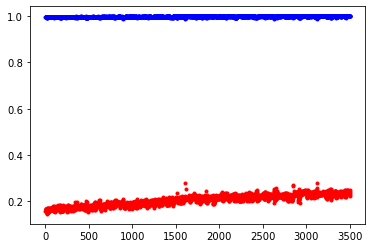

In [9]:
df = df_pre.sample(frac=0.15)
history = model.fit(X,Y,validation_split=0.33, epochs=3500, batch_size=500)

import matplotlib.pyplot as plt
# 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']
# 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['acc']

# 정확도를 파란색, 오차는 빨간색
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=3)
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3)
plt.show()

## 학습의 자동중단
- 학습이 진행될수록 학습셋의 정확도는 올라가지만, 과적합으로 인해 테스트셋의 실험 결과는 나빠진다.
- 테스트셋의 오차가 줄지 않으면 학습을 멈추게 하는 함수 활용

In [10]:
from keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)
model.fit(X,Y, validation_split=0.33, epochs=3500, batch_size=500, callbacks=[early_stopping_callback])

Train on 4352 samples, validate on 2145 samples
Epoch 1/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0061 - acc: 0.9979 - val_loss: 0.2307 - val_acc: 0.9907
Epoch 2/3500
4352/4352 [==============================] - 0s 6us/sample - loss: 0.0097 - acc: 0.9968 - val_loss: 0.2414 - val_acc: 0.9907
Epoch 3/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0123 - acc: 0.9968 - val_loss: 0.2323 - val_acc: 0.9902
Epoch 4/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0144 - acc: 0.9961 - val_loss: 0.2450 - val_acc: 0.9883
Epoch 5/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0117 - acc: 0.9963 - val_loss: 0.2500 - val_acc: 0.9879
Epoch 6/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0104 - acc: 0.9966 - val_loss: 0.2611 - val_acc: 0.9865
Epoch 7/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0291 - acc: 0.9913 - val_loss: 0.2507 - va

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0030 - acc: 0.9995 - val_loss: 0.2278 - val_acc: 0.9911
Epoch 60/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0025 - acc: 0.9995 - val_loss: 0.2275 - val_acc: 0.9925
Epoch 61/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0029 - acc: 0.9993 - val_loss: 0.2292 - val_acc: 0.9907
Epoch 62/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0033 - acc: 0.9991 - val_loss: 0.2305 - val_acc: 0.9907
Epoch 63/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0032 - acc: 0.9993 - val_loss: 0.2291 - val_acc: 0.9916
Epoch 64/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0035 - acc: 0.9991 - val_loss: 0.2255 - val_acc: 0.9925
Epoch 65/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0034 - acc: 0.9993 - val_loss: 0.2270 - val_acc: 0.9902
Epoch 66/3500
4352/4352 [================

4352/4352 [==============================] - 0s 4us/sample - loss: 0.0026 - acc: 0.9995 - val_loss: 0.2386 - val_acc: 0.9902
Epoch 118/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0023 - acc: 0.9995 - val_loss: 0.2423 - val_acc: 0.9921
Epoch 119/3500
4352/4352 [==============================] - 0s 4us/sample - loss: 0.0028 - acc: 0.9995 - val_loss: 0.2416 - val_acc: 0.9907
Epoch 120/3500
4352/4352 [==============================] - 0s 6us/sample - loss: 0.0030 - acc: 0.9993 - val_loss: 0.2333 - val_acc: 0.9925
Epoch 121/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0028 - acc: 0.9995 - val_loss: 0.2326 - val_acc: 0.9916
Epoch 122/3500
4352/4352 [==============================] - 0s 5us/sample - loss: 0.0027 - acc: 0.9993 - val_loss: 0.2323 - val_acc: 0.9916
Epoch 123/3500
4352/4352 [==============================] - 0s 6us/sample - loss: 0.0027 - acc: 0.9993 - val_loss: 0.2342 - val_acc: 0.9930
Epoch 124/3500
4352/4352 [=========